In [90]:
import requests
import numpy as np
import sys
import matplotlib.pyplot as plt

In [125]:
def get_country_data(country):
    url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/json/"
    r= requests.get(url)
    json = r.json()
    data = json['records']
    deaths = np.zeros((len(data)))
    cases = np.zeros(len(data))
   #print(len(deaths))
    i =0
    for j in range(len(data)):
        if (data[j]['geoId'] == country):
                deaths[i] = data[j]['deaths']
                cases[i] = data[j]['cases']
                i += 1 
    cases = cases[cases != 0]
    deaths = deaths[:len(cases)]
    #print(len(deaths))
    #print(len(cases))
    deaths = np.flip(deaths)
    cases = np.flip(cases)
    return deaths,cases

def plot(deaths, cases, label, interval = False):
    if(interval != False):
            plt.yticks(np.arange(0, max(cases)+1, interval))
    plt.title(label)
    plt.plot(deaths, 'r')
    plt.plot(cases, 'b')
    plt.show()
def rollingAverages(arr,days):
    new = []
    j = 0
    for i in range(len(arr)):
        if (i+1<days):
            new.append(0)
        else:
            new.append(np.sum(arr[(i-days):i+1])/days)
    return new
def listGeoId():
    url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/json/"
    r= requests.get(url)
    json = r.json()
    data = json['records']
    geoIds = []
    for i in data:
        if i['geoId'] not in geoIds:
            geoIds.append(i['geoId'])
    return geoIds
def getPop(country):
    url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/json/"
    r= requests.get(url)
    json = r.json()
    data = json['records']
    for i in data:
        if i['geoId'] in country:
            return(i['popData2018'])

In [136]:
geoid = listGeoId()
geoid = np.array(geoid)
geoid.sort()
print(geoid)


['AD' 'AE' 'AF' 'AG' 'AI' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' 'AW' 'AZ' 'BA'
 'BB' 'BD' 'BE' 'BF' 'BG' 'BH' 'BI' 'BJ' 'BM' 'BN' 'BO' 'BQ' 'BR' 'BS'
 'BT' 'BW' 'BY' 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO'
 'CR' 'CU' 'CV' 'CW' 'CY' 'CZ' 'DE' 'DJ' 'DK' 'DM' 'DO' 'DZ' 'EC' 'EE'
 'EG' 'EL' 'ER' 'ES' 'ET' 'FI' 'FJ' 'FK' 'FO' 'FR' 'GA' 'GD' 'GE' 'GG'
 'GH' 'GI' 'GL' 'GM' 'GN' 'GQ' 'GT' 'GU' 'GW' 'GY' 'HN' 'HR' 'HT' 'HU'
 'ID' 'IE' 'IL' 'IM' 'IN' 'IQ' 'IR' 'IS' 'IT' 'JE' 'JM' 'JO' 'JP'
 'JPG11668' 'KE' 'KG' 'KH' 'KN' 'KR' 'KW' 'KY' 'KZ' 'LA' 'LB' 'LC' 'LI'
 'LK' 'LR' 'LT' 'LU' 'LV' 'LY' 'MA' 'MC' 'MD' 'ME' 'MG' 'MK' 'ML' 'MM'
 'MN' 'MP' 'MR' 'MS' 'MT' 'MU' 'MV' 'MW' 'MX' 'MY' 'MZ' 'NA' 'NC' 'NE'
 'NG' 'NI' 'NL' 'NO' 'NP' 'NZ' 'OM' 'PA' 'PE' 'PF' 'PG' 'PH' 'PK' 'PL'
 'PR' 'PS' 'PT' 'PY' 'QA' 'RO' 'RS' 'RU' 'RW' 'SA' 'SC' 'SD' 'SE' 'SG'
 'SI' 'SK' 'SL' 'SM' 'SN' 'SO' 'SR' 'SS' 'ST' 'SV' 'SX' 'SY' 'SZ' 'TC'
 'TD' 'TG' 'TH' 'TL' 'TN' 'TR' 'TT' 'TW' 'TZ' 'UA' 'UG' 'UK' 'US' 'UY'
 'UZ' 'VA'

60431283


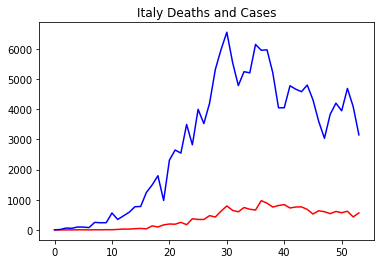

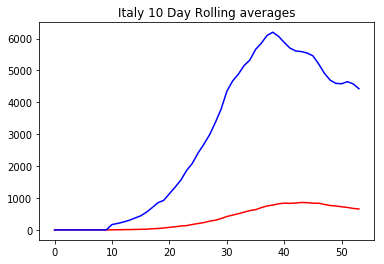

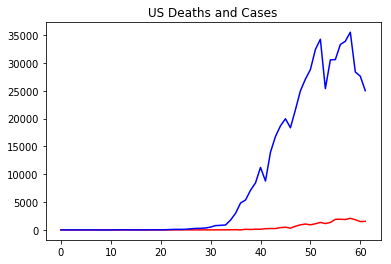

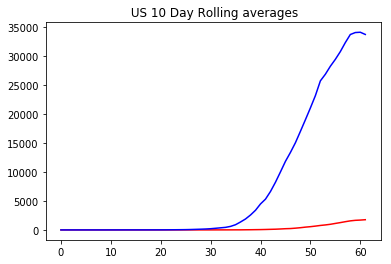

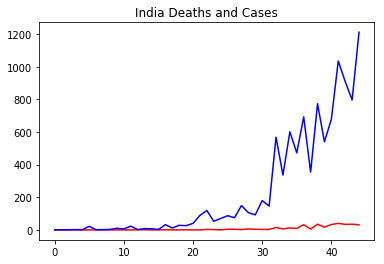

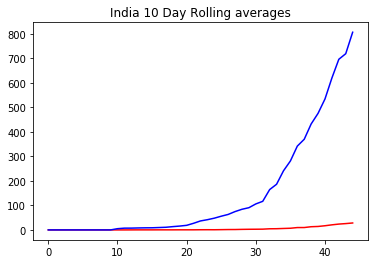

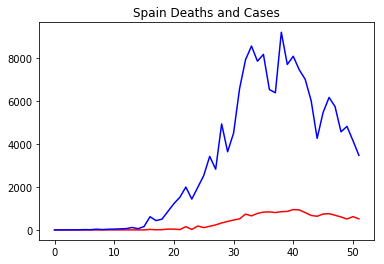

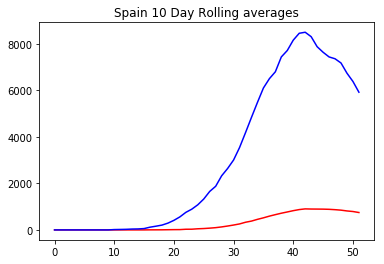

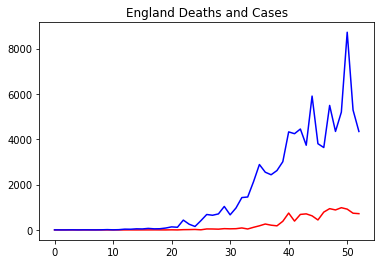

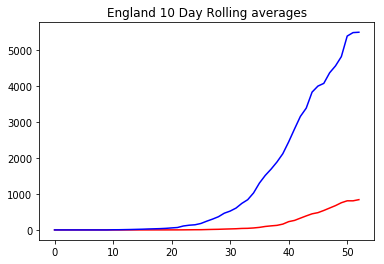

In [133]:
print(getPop("IT"))
deaths,cases = get_country_data("IT")
deaths2,cases2 = get_country_data("US")
deaths3,cases3 = get_country_data("IN")
deaths4,cases4 = get_country_data("ES")
deaths5,cases5 = get_country_data("UK")
plot(deaths, cases, "Italy Deaths and Cases")
#print(rollingAverages(deaths, 10))
days = 10
plot(rollingAverages(deaths, days), rollingAverages(cases,days), "Italy 10 Day Rolling averages")
plot(deaths2, cases2, "US Deaths and Cases")
plot(rollingAverages(deaths2,days), rollingAverages(cases2,days), " US 10 Day Rolling averages")
plot(deaths3, cases3, "India Deaths and Cases")
plot(rollingAverages(deaths3,days), rollingAverages(cases3,days), "India 10 Day Rolling averages")
plot(deaths4, cases4, "Spain Deaths and Cases")
plot(rollingAverages(deaths4,days), rollingAverages(cases4,days), "Spain 10 Day Rolling averages")
plot(deaths5, cases5, "England Deaths and Cases")
plot(rollingAverages(deaths5,days), rollingAverages(cases5,days), "England 10 Day Rolling averages")

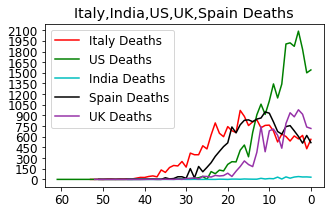

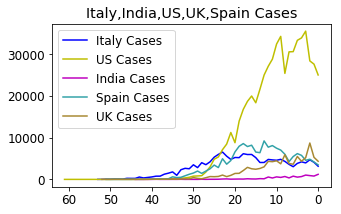

In [183]:
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams.update({'font.size': 12})
plt.yticks(np.arange(0, max(cases)+1, 150))
plt.gca().invert_xaxis()
plt.title("Italy,India,US,UK,Spain Deaths")
italyDeaths, = plt.plot(np.flip(deaths), 'r',label='Italy Deaths')
usDeaths, = plt.plot(np.flip(deaths2), 'g',label='US Deaths')
indiaDeaths, = plt.plot(np.flip(deaths3), 'c',label='India Deaths')
spainDeaths, = plt.plot(np.flip(deaths4), 'k',label='Spain Deaths')
ukDeaths, = plt.plot(np.flip(deaths5), '#9632a8',label='UK Deaths')
plt.legend(handles=(italyDeaths,usDeaths,indiaDeaths,spainDeaths,ukDeaths))
#plt.legend(handles=ukCases)
plt.savefig('covid19death.png')
plt.show()

plt.gca().invert_xaxis()
plt.title("Italy,India,US,UK,Spain Cases")
italyCases, = plt.plot(np.flip(cases), 'b',label='Italy Cases')

usCases, = plt.plot(np.flip(cases2), 'y',label='US Cases')

indiaCases, = plt.plot(np.flip(cases3), 'm',label='India Cases')

spainCases, = plt.plot(np.flip(cases4), '#32a2a8',label='Spain Cases')

ukCases, = plt.plot(np.flip(cases5), '#a88932',label='UK Cases')
plt.legend(handles=(italyCases, usCases, indiaCases,spainCases, ukCases))
#plt.legend(handles=ukCases)
plt.savefig('covid19case.png')
plt.show()

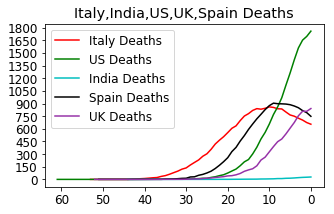

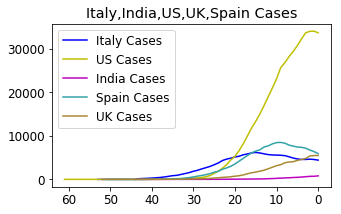

In [190]:
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams.update({'font.size': 12})
plt.yticks(np.arange(0, max(cases)+1, 150))
plt.gca().invert_xaxis()
plt.title("Italy,India,US,UK,Spain Deaths")
italyDeaths, = plt.plot(np.flip(rollingAverages(deaths,days)), 'r',label='Italy Deaths')
usDeaths, = plt.plot(np.flip(rollingAverages(deaths2,days)), 'g',label='US Deaths')
indiaDeaths, = plt.plot(np.flip(rollingAverages(deaths3,days)), 'c',label='India Deaths')
spainDeaths, = plt.plot(np.flip(rollingAverages(deaths4,days)), 'k',label='Spain Deaths')
ukDeaths, = plt.plot(np.flip(rollingAverages(deaths5,days)), '#9632a8',label='UK Deaths')
plt.legend(handles=(italyDeaths,usDeaths,indiaDeaths,spainDeaths,ukDeaths))
#plt.legend(handles=ukCases)
plt.savefig('covid19deathsroling.png')
plt.show()

#plt.yticks(np.arange(0, max(cases)+1, 6000))
plt.gca().invert_xaxis()
plt.title("Italy,India,US,UK,Spain Cases")
italyCases, = plt.plot(np.flip(rollingAverages(cases,days)), 'b',label='Italy Cases')

usCases, = plt.plot(np.flip(rollingAverages(cases2,days)), 'y',label='US Cases')

indiaCases, = plt.plot(np.flip(rollingAverages(cases3,days)), 'm',label='India Cases')

spainCases, = plt.plot(np.flip(rollingAverages(cases4,days)), '#32a2a8',label='Spain Cases')

ukCases, = plt.plot(np.flip(rollingAverages(cases5,days)), '#a88932',label='UK Cases')
plt.legend(handles=(italyCases, usCases, indiaCases,spainCases, ukCases))
#plt.legend(handles=ukCases)
plt.savefig('covid19caserolling.png')
plt.show()